### Libraries

In [4]:
library(dviz.supp)
library(forcats)
# library(patchwork)
library(lubridate)


Attaching package: ‘lubridate’


The following object is masked from ‘package:dviz.supp’:

    stamp


The following object is masked from ‘package:cowplot’:

    stamp


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Data preprocessing (mean temps)

In [5]:
month_names <- c("01" = "Jan", "02" = "Feb", "03" = "Mar", "04" = "Apr", "05" = "May", "06" = "Jun",
                   "07" = "Jul", "08" = "Aug", "09" = "Sep", "10" = "Oct", "11" = "Nov", "12" = "Dec")


mean_temps <- temps_long %>%
  group_by(location, month) %>%
  summarize(mean = mean(temperature)) %>%
  ungroup() %>%
  mutate(month = month_names[month]) %>%
  mutate(month = factor(month, levels = unname(month_names)))

head(mean_temps)

`summarise()` has grouped output by 'location'. You can override using the
`.groups` argument.


location,month,mean
<fct>,<fct>,<dbl>
Death Valley,Jan,53.45161
Death Valley,Feb,59.94483
Death Valley,Mar,68.44839
Death Valley,Apr,76.29333
Death Valley,May,86.60645
Death Valley,Jun,95.54667


### Plot

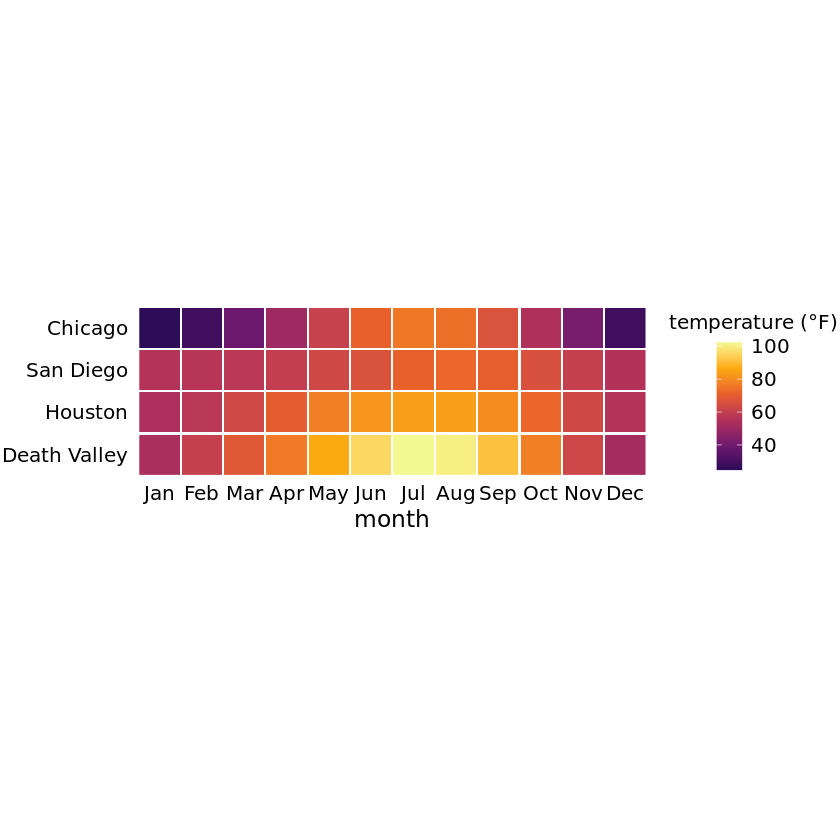

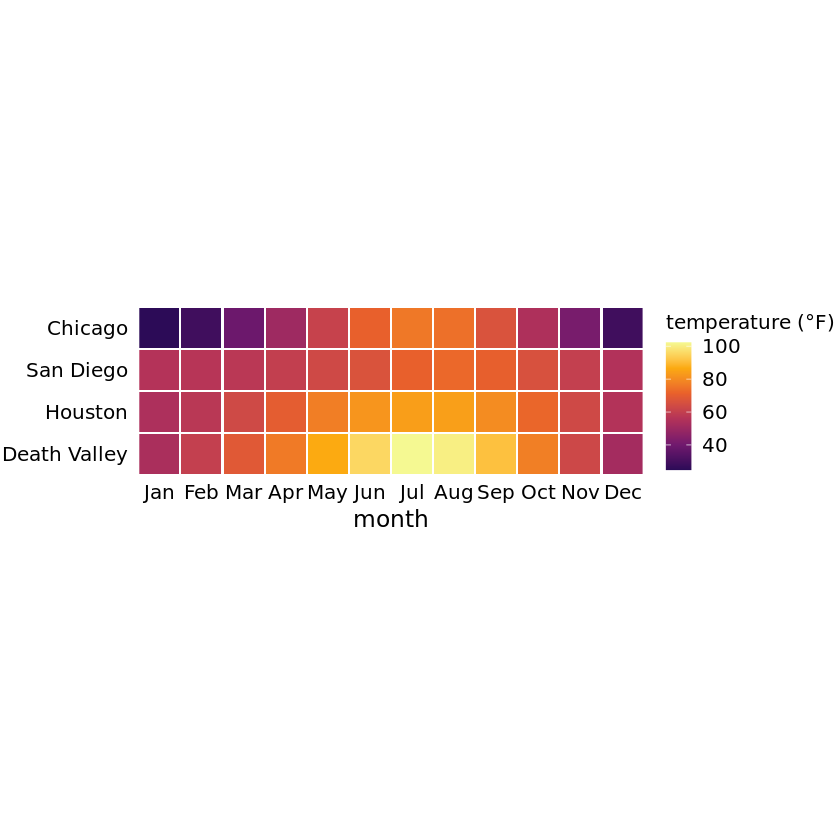

In [11]:
p <- ggplot(mean_temps, aes(x = month, y = location, fill = mean)) + 
  geom_tile(width = .95, height = 0.95) +
  scale_fill_viridis_c(option = "B", begin = 0.15, end = 0.98,
                       name = "temperature (°F)") + 
  scale_y_discrete(name = NULL) +
  coord_fixed(expand = FALSE) +
  theme_dviz_open() +
  theme(axis.line = element_blank(),
        axis.ticks = element_blank(),
        #axis.text.y = element_text(size = 14),
        legend.title = element_text(size = 12)
        )
# fix legend (make it centered)
ggdraw(align_legend(p))
p